### Single Task Learner

In [4]:
from utils.utils import calculate_attributions
import matplotlib.pyplot as plt 
import numpy as np


In [1]:
import pandas as pd
import numpy as np
dataset = "Coffee"


task  = 'task_1'
output_directory = f'G:/My Drive/master thesis/code/dl-4-tsc-mtl/results/ucr/{dataset}/fcn/fcn_itr_0/original/'
att_stl_train = np.load(output_directory + f"calculated_attribution_train_{task}.npy",allow_pickle=True)
att_stl_test = np.load(output_directory + f"calculated_attribution_test_{task}.npy",allow_pickle=True)

output_directory = f'G:/My Drive/master thesis/code/dl-4-tsc-mtl/results/ucr/{dataset}/fcn/fcn_mt_itr_0/unbalanced_exp/'
attr_unba_task_1_train = np.load(output_directory + f"calculated_attribution_train_{task}.npy",allow_pickle=True)
attr_unba_task_1_test = np.load(output_directory + f"calculated_attribution_test_{task}.npy",allow_pickle=True)

task = 'task_2'
attr_unba_task_2_train = np.load(output_directory + f"calculated_attribution_train_{task}.npy",allow_pickle=True)
attr_unba_task_2_test = np.load(output_directory + f"calculated_attribution_test_{task}.npy",allow_pickle=True)

In [19]:
def get_len_and_step_size(attributions, slices=5):
    attr_len  = len(attributions)
    step_size = int(attr_len / slices)
    return attr_len,step_size

def highest_mean_attribution(att,slices): 
    attr_len, step_size = get_len_and_step_size(att,slices)
    candidates = []
    for x in range(0,attr_len,step_size):
        candidates.append(att[x:x+step_size-1].mean())
    return np.argmax(candidates)

def find_lower_upper_bound(xvals,att,slices): 
    attr_len, step_size = get_len_and_step_size(att,slices)
    attr_len -= attr_len % step_size
    #print(attr_len,step_size)
    l1,l2,sl = (0,0,0)
    highest_mean, curr_mean = (0,0)
    boundaries = []
    for i,x in enumerate(range(0,attr_len,step_size)):
        lower_bound = xvals[x]
        upper_bound = xvals[x+step_size-1]
        boundaries.append((lower_bound,upper_bound))
        cur_mean = att[x:x+step_size-1].mean()
        #print(cur_mean)
        if cur_mean > highest_mean: 
            sl = i
            highest_mean = cur_mean 
            l1,l2 = (lower_bound, upper_bound)
    return l1,l2,sl,boundaries
#l1,l2,sl,boundaries = find_lower_upper_bound(attr_STL[ts][1],attr_STL[ts][3],5)

In [6]:
from collections import Counter
dataset = 'Coffee'
f_tr = f'G:/My Drive/master thesis/code/dl-4-tsc-mtl/archives/ucr/{dataset}/unbalanced_exp/{dataset}_TRAIN'
f_te = f'G:/My Drive/master thesis/code/dl-4-tsc-mtl/archives/ucr/{dataset}/unbalanced_exp/{dataset}_TEST'
#G:\My Drive\master thesis\code\dl-4-tsc-mtl\archives\ucr\GunPoint\unbalanced_exp
y_tr = np.loadtxt(f_tr, delimiter=',')[:, 0]
y_val = np.loadtxt(f_te, delimiter=',')[:, 0]

print(set(y_tr))
plt.hist(y_tr)
#np.load(output_directory + f"calculated_attribution_train_{task}.npy",allow_pickle=True

{0.0, 3.0, 4.0}


(array([ 6.,  0.,  0.,  0.,  0.,  0.,  0., 19.,  0.,  3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

{0.0, 3.0, 4.0}


(array([ 8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  5.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

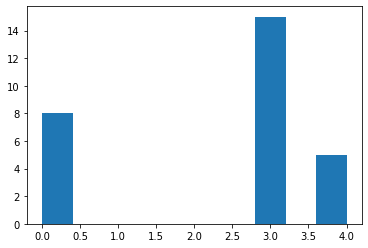

In [167]:
print(set(y_val))
plt.hist(y_val)

In [158]:
ii = 0
for a in att_stl_test:
    if highest_mean_attribution(a[3],5) == 4:
        ii+=1
print(ii)

14


In [29]:
%matplotlib inline

def plot_attributions_stl_to_mtl(ts,slices,attribution_1,attribution_2,attribution_3, title='No title'): 
    """
    row 1 / attribution 1: Single Task Learner 
    row 2 / attribution 2: Multitask Learner - Task 1
    row 3 / attribution 3: Multitask Learner - Task 2
    """
    
    def plot_axv_lines(ax,boundaries): 
        axes[ax].axvline(boundaries[0][0],color="black",alpha=0.3)
        for i in range(slices):
            #print(boundaries)
            axes[ax].axvline(boundaries[i][1],color="black",alpha=0.3)
    
    def plot_attribution(ax,att): 
            axes[ax].scatter(x=att[ts][1], 
                            y=att[ts][2], 
                            c=att[ts][3], 
                            cmap='jet', marker='.', s=2, vmin=0, vmax=100, linewidths=2.0)
            
            l1,l2,sl,boundaries = find_lower_upper_bound(att[ts][1],att[ts][3],slices)
            axes[ax].axvspan(l1,l2,color="red",alpha=0.3)
            axes[ax].set_title(f"Most Attributed {sl}, Y_pred: {att[ts][4]}, Y_true: {att[ts][5]}")
            plot_axv_lines(ax,boundaries)
            if axis ==2: 
                parts  = [0.0, 3.0, 4.0]
                print(attribution_3[axis][4][0])
                axes[2].axvspan(boundaries[parts[attribution_3[4][0]]],
                        boundaries[parts[attribution_3[4][1]]],
                        color="blue",
                        alpha=0.3)
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    for axis, attribution in enumerate([attribution_1,attribution_2,attribution_3]):
        plot_attribution(axis,attribution)
    
    fig.suptitle(title,fontsize=16)
    fig.tight_layout()
    plt.show

2000 400
2000 400
2000 400


TypeError: 'float' object is not subscriptable

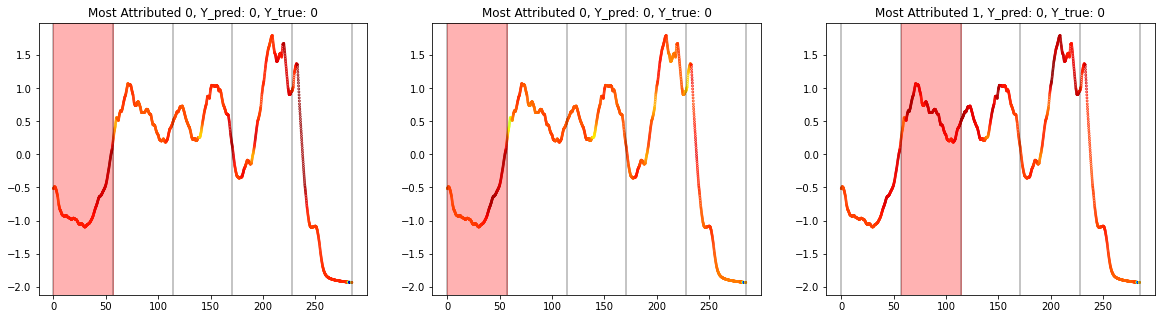

In [27]:
examples = [0,10,15,27]
slices = 5
for ts in examples:
    plot_attributions_stl_to_mtl(ts,slices,att_stl_train, attr_unba_task_1_train,attr_unba_task_2_train)

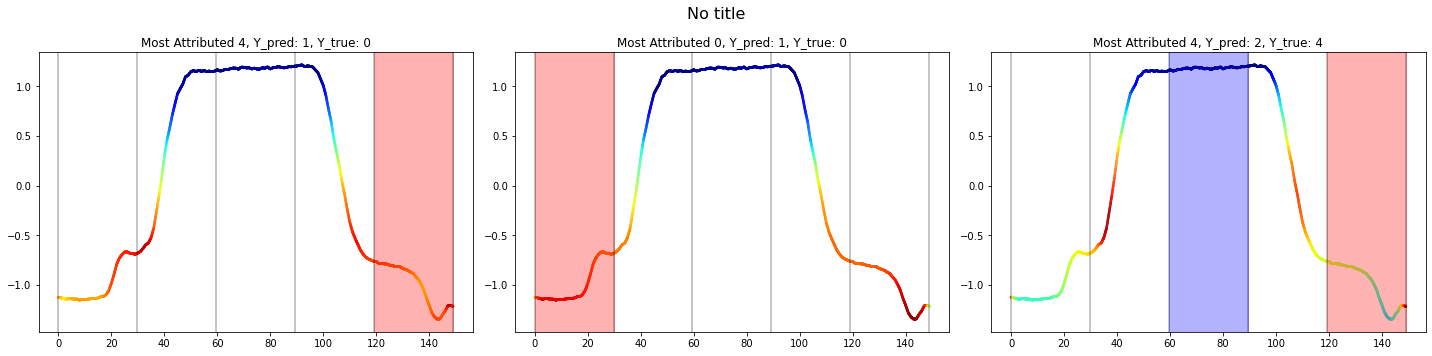

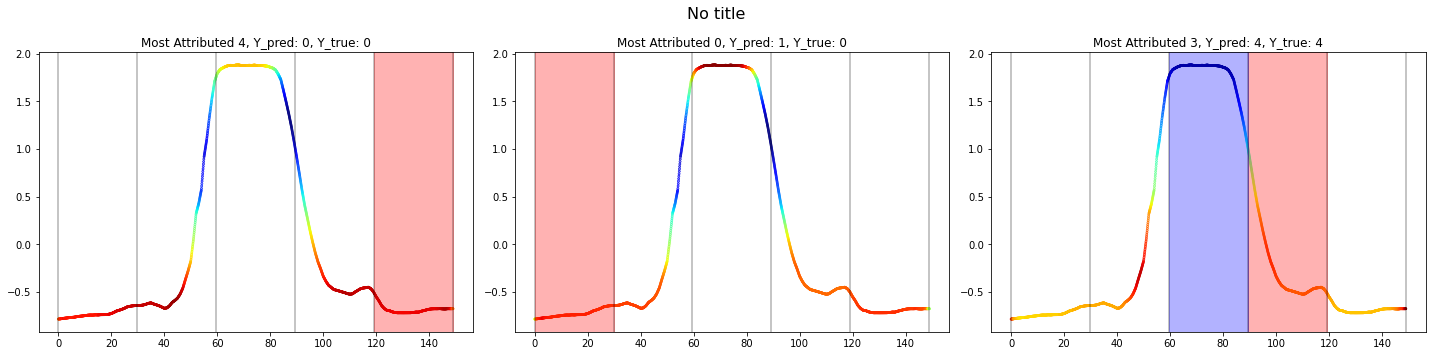

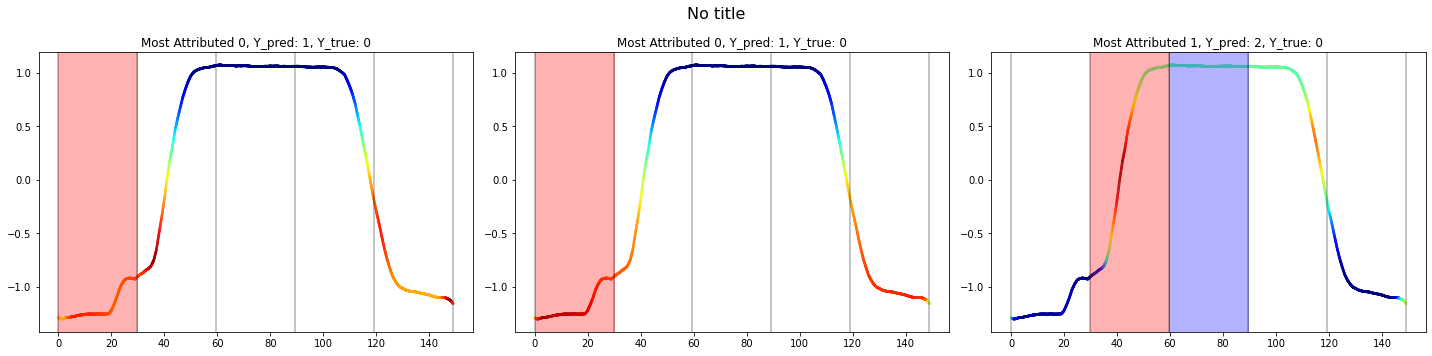

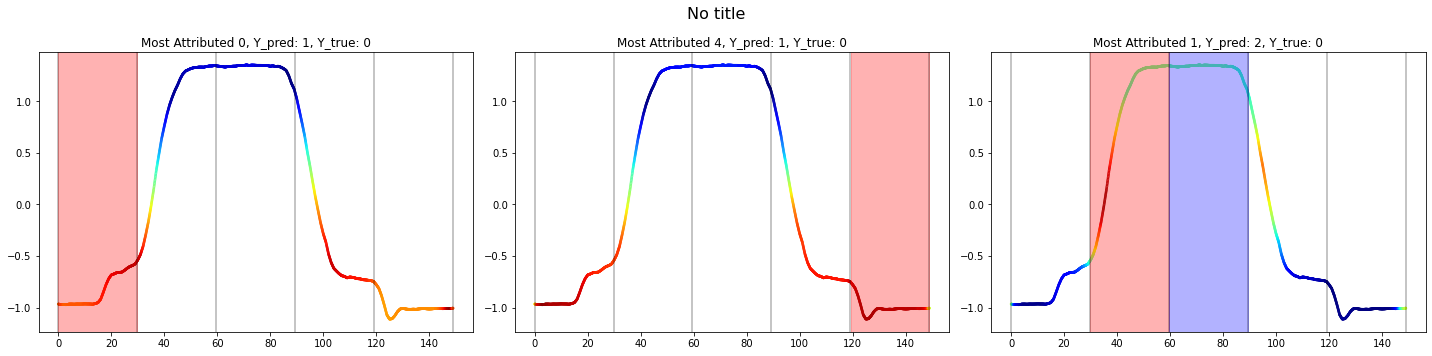

In [120]:
#Examples 
examples = [0,40,80,120]
slices = 5
for ts in examples:
    plot_attributions_stl_to_mtl(ts,slices,att_stl_test, attr_unba_task_1_test,attr_unba_task_2_test)

In [170]:
def analyse_attributions_and_predictions(attribution1,attribution2,attribution3,slices):

    # Highest mean attribution = HMA

    # A1: Highest mean attribution of stl against mtl task1: 
    a1 = 0 
    # A2: Highest mean attribution of stl against mtl task2:
    a2 = 0
    # A2: Highest mean attribution of stl against mtl task2:
    a3 = 0

    # M1: Highest mean attribution in STL against the prediction of Task2 (Accuracy of Task2)
    m1 = 0
    # M2: Highest mean attributed part of Task1 against the prediction of Task2. 
    m2 = 0
    # m3: Highest mean attributed part Task2 against the prediction of Task2. 
    m3 = 0

    assert attribution1.shape==attribution2.shape==attribution3.shape
    total_ts = attribution1.shape[0]

    for t0,t1,t2 in zip(attribution1,attribution2,attribution3): 
        #Compare Attributions
        if highest_mean_attribution(t0[3],slices) == highest_mean_attribution(t1[3],slices):
            a1 += 1
        if highest_mean_attribution(t0[3],slices) == highest_mean_attribution(t2[3],slices):
            a2 += 1
        if highest_mean_attribution(t1[3],slices) == highest_mean_attribution(t2[3],slices):
            a3 += 1
        #Compare Attributions to predictions
        y_pred = t2[4]
        if highest_mean_attribution(t0[3],slices) == y_pred:
            m1 += 1
        if highest_mean_attribution(t1[3],5) == y_pred:
            m2 += 1
        if highest_mean_attribution(t2[3],5) == y_pred:
            m3 += 1
            
    output = np.array([a1,a2,a3,m1,m2,m3]) / total_ts 
    return output
        
pd.DataFrame(analyse_attributions_and_predictions(att_stl_train, attr_unba_task_1_train, attr_unba_task_2_train,5))

,0
0,0.48
1,0.30
2,0.34
3,0.82
4,0.42
5,0.30


In [171]:
pd.DataFrame(analyse_attributions_and_predictions(att_stl_test, attr_unba_task_1_test, attr_unba_task_2_test,5))

,0
0,0.593333
1,0.246667
2,0.353333
3,0.700000
4,0.506667
5,0.280000
